# Titanic - Machine Learning from Disaster 

In [1]:
# Importing all the necessary libraries
# -------------------------------------

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Deepak kumar\AppData\Local\Temp\ipykernel_9484\906625151.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# loading the dataset using pandas
# --------------------------------

path=r"train.csv"
data=pd.read_csv(path)

In [3]:
data.shape

(891, 12)

In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 2})

<Axes: xlabel='PassengerId', ylabel='Sex'>

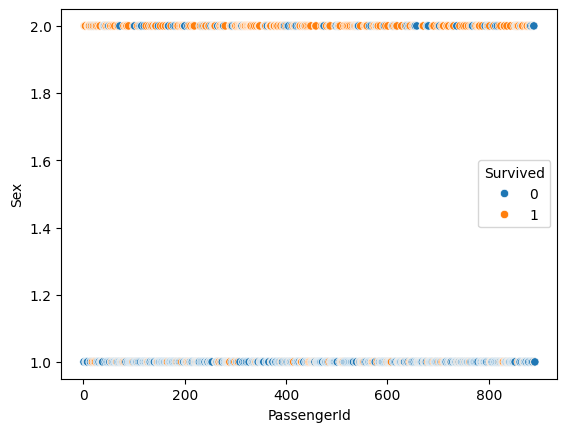

In [7]:
sns.scatterplot(data=data,x='PassengerId',y='Sex',hue='Survived')

In [8]:
# Feature Selection (X,y)
#------------------------

features = ['Pclass', 'Sex', 'SibSp','Parch', 'Fare']
X = data[features]

y = data['Survived']

In [9]:
print(X.shape)
print(y.shape)

(891, 5)
(891,)


In [10]:
print(X[:5])

#print(y[:5])

   Pclass  Sex  SibSp  Parch     Fare
0       3    1      1      0   7.2500
1       1    2      1      0  71.2833
2       3    2      0      0   7.9250
3       1    2      1      0  53.1000
4       3    1      0      0   8.0500


# Random Forest

In [11]:
# Data spliting 
# -------------

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [12]:
# Invoking algorithm
# ------------------

cf = RandomForestClassifier(n_estimators=10,criterion='gini',random_state=4)
cf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=4)

In [13]:
# Model prediction
# ----------------

ypre_rf = cf.predict(X_test)
mx=confusion_matrix(y_test,ypre_rf)
mx

array([[104,  12],
       [ 22,  41]], dtype=int64)

In [14]:
report=classification_report(y_test,ypre_rf)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       116
           1       0.77      0.65      0.71        63

    accuracy                           0.81       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



In [15]:
score=accuracy_score(y_test,ypre_rf)*100
score

81.00558659217877

In [16]:
# Actual output VS Predicted output
# ---------------------------------
compare = pd.DataFrame({'actual output':y_test, 'predicted output':ypre_rf})
compare

,actual output,predicted output
679,1,0
177,0,1
317,0,0
29,0,0
72,0,0
...,...,...
115,0,0
881,0,0
740,1,1
51,0,0


# K Nearest Neighbor - KNN

In [17]:
# spliting data
# -------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [18]:
# standar scalar

scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [19]:
X_train[:3]

array([[-1.55247675, -0.74242727, -0.4668076 , -0.4841652 , -0.09393818],
       [ 0.8349173 ,  1.34693328,  0.42187424,  0.70454384, -0.32056163],
       [ 0.8349173 , -0.74242727, -0.4668076 , -0.4841652 , -0.47889864]])

In [20]:

k = KNeighborsClassifier(n_neighbors=3)
k.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
ypre_k = k.predict(X_test)
ypre_k

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [22]:
confusion_matrix(y_test,ypre_k)

array([[85, 15],
       [29, 50]], dtype=int64)

In [23]:
print(classification_report(y_test,ypre_k))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.77      0.63      0.69        79

    accuracy                           0.75       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



In [24]:
accuracy_score(y_test,ypre_k)*100

75.41899441340783

In [25]:
# Actual output VS Predicted output
# ---------------------------------
compare2 = pd.DataFrame({'actual output':y_test, 'predicted output':ypre_k})
compare2

,actual output,predicted output
707,1,1
37,0,0
615,1,1
169,0,1
68,1,0
...,...,...
89,0,0
80,0,0
846,0,0
870,0,0


# Logistic Regression

In [26]:
# invoking algorithm
# ------------------

logreg = LogisticRegression()

In [27]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [28]:
# model prediction
# ----------------

ypre_lg = logreg.predict(X_test)

In [29]:
confusion_matrix(y_test,ypre_lg)

array([[89, 11],
       [31, 48]], dtype=int64)

In [30]:
print(classification_report(y_test,ypre_lg))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.81      0.61      0.70        79

    accuracy                           0.77       179
   macro avg       0.78      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179



In [31]:
accuracy_score(y_test,ypre_lg)*100

76.53631284916202

# Final accuracy

In [32]:
report = pd.DataFrame({'model':['randomforest','KNN', 'logreg'],
                       'accuracy %':[accuracy_score(y_test,ypre_rf)*100,accuracy_score(y_test,ypre_k)*100,accuracy_score(y_test,ypre_lg)*100]})
report

,model,accuracy %
0,randomforest,55.307263
1,KNN,75.418994
2,logreg,76.536313


<Axes: ylabel='accuracy %'>

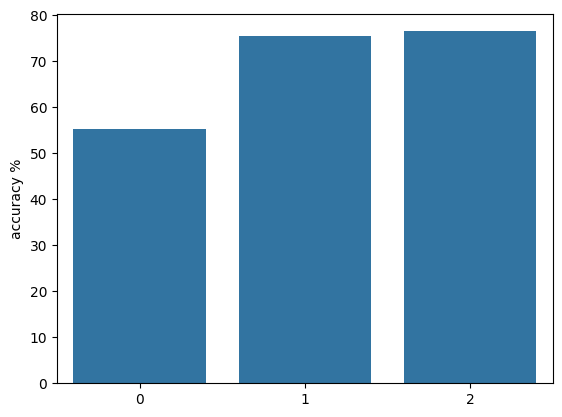

In [33]:
sns.barplot(report['accuracy %'])

# Conclusion

Based on the provived accuracies, Logistic regression demonstrates the highest performance at 76.54%, followed by KNN at 75.41%, Random forest lags behind with an accuracy of 55.30% Therefore, for this Logistic regression proves to be the most effective model offering the highest predictive accuracy among the options